## Problem 1 : Less data to train

### Solution : Data Augmentation

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in the Emergency dataset

data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [3]:
# Checking the first 5 rows of the dataset

data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
# checking the shape of the dataset

data.shape

(2352, 2)

In [5]:
# Let's first check the number of images per class

data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [6]:
# Extracting the name and target of a random image in the data dataframe

random_id = 777 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]

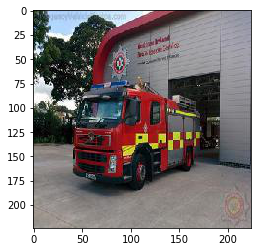

In [7]:
# Reading and plotting the random image

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

plt.imshow(img)
plt.show()

In [8]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [9]:
# Importing the ImageDataGenerator for Image Augmentation

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [10]:
# Intializing the ImageDataGenerator object with the Augmentations that we want.

# 1. rotation_range

datagen = ImageDataGenerator(shear_range=0.5)

In [11]:
# Reshaping the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [12]:
#checking the shape of the reshaped array

img.shape

(1, 224, 224, 3)

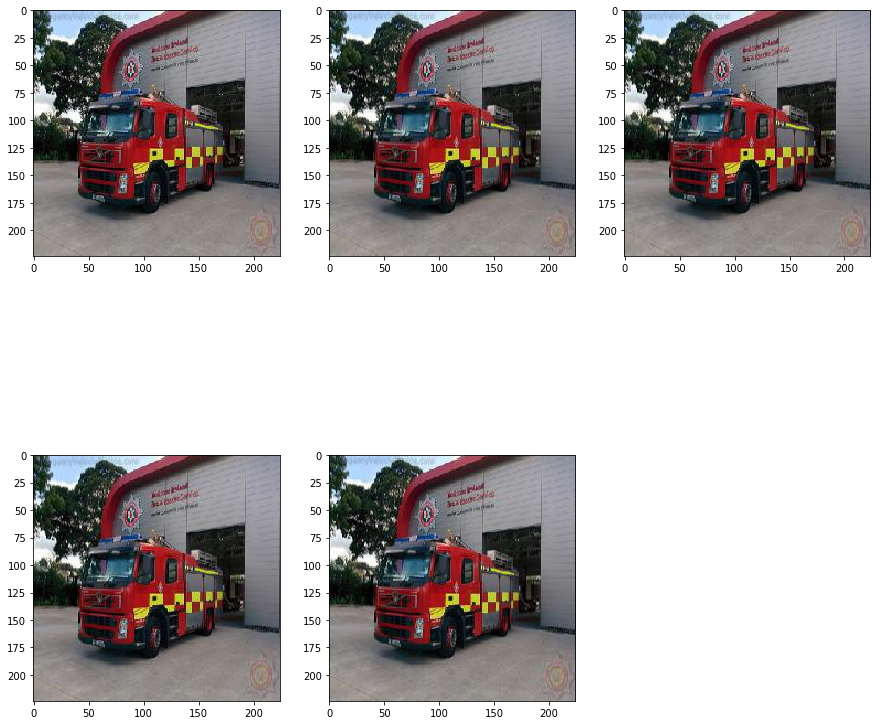

In [13]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()

## Problem 2 - Lots of Variation in Data

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


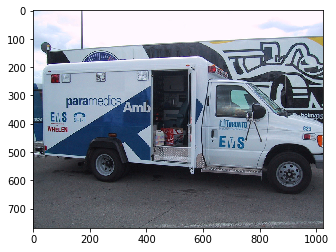

In [15]:
img = plt.imread('images/emergency_100.jpg')

plt.imshow(img)
plt.show()

In [16]:
img.shape

(768, 1024, 3)

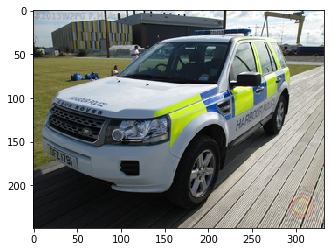

In [17]:
img = imread('images/emergency_1000.jpg')

pylab.imshow(img)
pylab.show()

In [18]:
img.shape

(249, 333, 3)

In [19]:
from keras.preprocessing import image

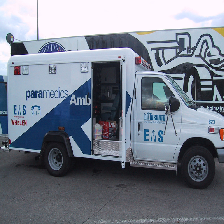

In [20]:
image.load_img('images/emergency_100.jpg', target_size=(224, 224))

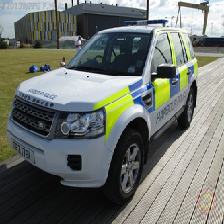

In [21]:
image.load_img('images/emergency_1000.jpg', target_size=(224, 224))

## Problem 3 - Overfitting

### Dropout

In [22]:
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [24]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [25]:
images = []
for img_loc in data.image_names:
    img = image.load_img('../datasets/emergency_classification/images/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [26]:
train_x = images.reshape(2352, 100*100*3)

In [27]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [28]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [29]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [30]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6931 - acc: 0.5650 - val_loss: 0.6602 - val_acc: 0.5977
Epoch 2/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.6466 - acc: 0.6197 - val_loss: 0.6371 - val_acc: 0.6402
Epoch 3/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.6298 - acc: 0.6519 - val_loss: 0.6293 - val_acc: 0.6544
Epoch 4/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.6173 - acc: 0.6695 - val_loss: 0.6244 - val_acc: 0.6501
Epoch 5/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.6077 - acc: 0.6810 - val_loss: 0.6232 - val_acc: 0.6388
Epoch 6/500
1646/1646 [==============================] - 0s 192us/step - loss: 0.6035 - acc: 0.6908 - val_loss: 0.6024 - val_acc: 0.6785
Epoch 7/500
1646/1646 [==============================] - 0s 172us/step - loss: 0.5968 - acc: 0.6908 - val_loss: 0.5981 - val_acc: 0.6

1646/1646 [==============================] - 0s 163us/step - loss: 0.4502 - acc: 0.8135 - val_loss: 0.5413 - val_acc: 0.7082
Epoch 61/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.4590 - acc: 0.7934 - val_loss: 0.5437 - val_acc: 0.7096
Epoch 62/500
1646/1646 [==============================] - 0s 191us/step - loss: 0.4514 - acc: 0.8032 - val_loss: 0.5474 - val_acc: 0.7167
Epoch 63/500
1646/1646 [==============================] - 0s 172us/step - loss: 0.4472 - acc: 0.8068 - val_loss: 0.5384 - val_acc: 0.7181
Epoch 64/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.4529 - acc: 0.7989 - val_loss: 0.5421 - val_acc: 0.7082
Epoch 65/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.4549 - acc: 0.7995 - val_loss: 0.5475 - val_acc: 0.7125
Epoch 66/500
1646/1646 [==============================] - 0s 176us/step - loss: 0.4432 - acc: 0.8092 - val_loss: 0.5885 - val_acc: 0.6955
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 147us/step - loss: 0.3799 - acc: 0.8348 - val_loss: 0.5380 - val_acc: 0.7210
Epoch 120/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3687 - acc: 0.8493 - val_loss: 0.5330 - val_acc: 0.7181
Epoch 121/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3503 - acc: 0.8767 - val_loss: 0.6658 - val_acc: 0.6643
Epoch 122/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4052 - acc: 0.8098 - val_loss: 0.5972 - val_acc: 0.6841
Epoch 123/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.3877 - acc: 0.8287 - val_loss: 0.5516 - val_acc: 0.7195
Epoch 124/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.3706 - acc: 0.8505 - val_loss: 0.5735 - val_acc: 0.7068
Epoch 125/500
1646/1646 [==============================] - 0s 129us/step - loss: 0.4028 - acc: 0.8214 - val_loss: 0.5280 - val_acc: 0.7351
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 144us/step - loss: 0.4183 - acc: 0.8007 - val_loss: 0.5272 - val_acc: 0.7380
Epoch 179/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.2812 - acc: 0.9034 - val_loss: 0.5300 - val_acc: 0.7351
Epoch 180/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.2954 - acc: 0.8949 - val_loss: 0.5644 - val_acc: 0.7280
Epoch 181/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.2742 - acc: 0.9125 - val_loss: 0.5337 - val_acc: 0.7394
Epoch 182/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.3061 - acc: 0.8858 - val_loss: 0.5739 - val_acc: 0.7153
Epoch 183/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4387 - acc: 0.7746 - val_loss: 0.6279 - val_acc: 0.6969
Epoch 184/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.2795 - acc: 0.9058 - val_loss: 0.5342 - val_acc: 0.7323
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 146us/step - loss: 0.2374 - acc: 0.9271 - val_loss: 0.6298 - val_acc: 0.6898
Epoch 238/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.3952 - acc: 0.8044 - val_loss: 0.7734 - val_acc: 0.6714
Epoch 239/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.2483 - acc: 0.9083 - val_loss: 0.5349 - val_acc: 0.7479
Epoch 240/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.2434 - acc: 0.9241 - val_loss: 0.7623 - val_acc: 0.6714
Epoch 241/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.3030 - acc: 0.8621 - val_loss: 0.6430 - val_acc: 0.6884
Epoch 242/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.3543 - acc: 0.8317 - val_loss: 0.5500 - val_acc: 0.7380
Epoch 243/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.2077 - acc: 0.9411 - val_loss: 0.5371 - val_acc: 0.7493
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 141us/step - loss: 0.3788 - acc: 0.8226 - val_loss: 0.9599 - val_acc: 0.6445
Epoch 297/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.2618 - acc: 0.8864 - val_loss: 0.5716 - val_acc: 0.7436
Epoch 298/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.2217 - acc: 0.9235 - val_loss: 0.6314 - val_acc: 0.7181
Epoch 299/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.1651 - acc: 0.9593 - val_loss: 0.5704 - val_acc: 0.7479
Epoch 300/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.1754 - acc: 0.9526 - val_loss: 0.5542 - val_acc: 0.7465
Epoch 301/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.1841 - acc: 0.9447 - val_loss: 1.1501 - val_acc: 0.6091
Epoch 302/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.3756 - acc: 0.8214 - val_loss: 0.5482 - val_acc: 0.7592
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 165us/step - loss: 0.2677 - acc: 0.8791 - val_loss: 0.5915 - val_acc: 0.7479
Epoch 356/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.1262 - acc: 0.9733 - val_loss: 0.5622 - val_acc: 0.7535
Epoch 357/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.1316 - acc: 0.9708 - val_loss: 0.5757 - val_acc: 0.7535
Epoch 358/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.1253 - acc: 0.9800 - val_loss: 0.6031 - val_acc: 0.7521
Epoch 359/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.1232 - acc: 0.9775 - val_loss: 0.5651 - val_acc: 0.7507
Epoch 360/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.1237 - acc: 0.9787 - val_loss: 0.7413 - val_acc: 0.6969
Epoch 361/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.1254 - acc: 0.9751 - val_loss: 0.6538 - val_acc: 0.7210
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 155us/step - loss: 0.1070 - acc: 0.9806 - val_loss: 0.6947 - val_acc: 0.7280
Epoch 415/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.0941 - acc: 0.9897 - val_loss: 0.5940 - val_acc: 0.7535
Epoch 416/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.1042 - acc: 0.9824 - val_loss: 0.6129 - val_acc: 0.7578
Epoch 417/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.0900 - acc: 0.9891 - val_loss: 0.6316 - val_acc: 0.7479
Epoch 418/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.0987 - acc: 0.9836 - val_loss: 0.7081 - val_acc: 0.7238
Epoch 419/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.0976 - acc: 0.9866 - val_loss: 0.6059 - val_acc: 0.7578
Epoch 420/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.0916 - acc: 0.9878 - val_loss: 0.6334 - val_acc: 0.7507
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 134us/step - loss: 0.0697 - acc: 0.9945 - val_loss: 0.6311 - val_acc: 0.7592
Epoch 474/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.0690 - acc: 0.9951 - val_loss: 0.6610 - val_acc: 0.7493
Epoch 475/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.0804 - acc: 0.9891 - val_loss: 0.6516 - val_acc: 0.7521
Epoch 476/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.0709 - acc: 0.9915 - val_loss: 0.7813 - val_acc: 0.7139
Epoch 477/500
1646/1646 [==============================] - 0s 162us/step - loss: 0.0873 - acc: 0.9824 - val_loss: 0.6134 - val_acc: 0.7450
Epoch 478/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.0699 - acc: 0.9939 - val_loss: 0.6151 - val_acc: 0.7436
Epoch 479/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.0673 - acc: 0.9939 - val_loss: 0.6154 - val_acc: 0.7450
Epoch 480/500
1646/1646 [================

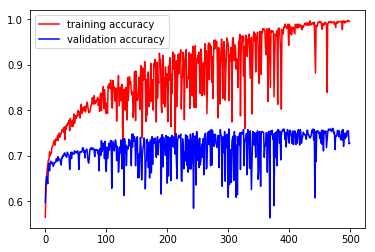

In [31]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

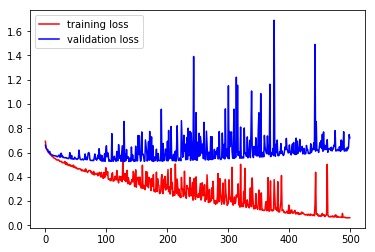

In [32]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

In [33]:
from keras.layers import Dropout

In [34]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
#model.add(Dropout(0.8))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [35]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 307us/step - loss: 0.6821 - acc: 0.5583 - val_loss: 0.6850 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 197us/step - loss: 0.6732 - acc: 0.5863 - val_loss: 0.6810 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.6692 - acc: 0.5863 - val_loss: 0.6762 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.6653 - acc: 0.5863 - val_loss: 0.6730 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.6620 - acc: 0.5857 - val_loss: 0.6681 - val_acc: 0.5637
Epoch 6/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.6581 - acc: 0.5917 - val_loss: 0.6640 - val_acc: 0.5708
Epoch 7/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.6550 - acc: 0.6081 - val_loss: 0.6615 - val_acc: 0

1646/1646 [==============================] - 0s 132us/step - loss: 0.5755 - acc: 0.7254 - val_loss: 0.5899 - val_acc: 0.6941
Epoch 61/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.5747 - acc: 0.7211 - val_loss: 0.5901 - val_acc: 0.6884
Epoch 62/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.5739 - acc: 0.7230 - val_loss: 0.5898 - val_acc: 0.6969
Epoch 63/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.5724 - acc: 0.7254 - val_loss: 0.5891 - val_acc: 0.6955
Epoch 64/500
1646/1646 [==============================] - 0s 129us/step - loss: 0.5720 - acc: 0.7224 - val_loss: 0.5923 - val_acc: 0.6884
Epoch 65/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.5704 - acc: 0.7230 - val_loss: 0.5909 - val_acc: 0.6898
Epoch 66/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.5690 - acc: 0.7321 - val_loss: 0.5879 - val_acc: 0.6955
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 148us/step - loss: 0.5149 - acc: 0.7673 - val_loss: 0.5595 - val_acc: 0.6969
Epoch 120/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.5145 - acc: 0.7649 - val_loss: 0.5653 - val_acc: 0.6941
Epoch 121/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.5134 - acc: 0.7679 - val_loss: 0.5585 - val_acc: 0.6955
Epoch 122/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.5121 - acc: 0.7691 - val_loss: 0.5568 - val_acc: 0.7040
Epoch 123/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.5116 - acc: 0.7649 - val_loss: 0.5557 - val_acc: 0.7054
Epoch 124/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.5103 - acc: 0.7649 - val_loss: 0.5582 - val_acc: 0.7011
Epoch 125/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.5103 - acc: 0.7728 - val_loss: 0.5694 - val_acc: 0.6884
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 146us/step - loss: 0.4583 - acc: 0.8032 - val_loss: 0.5442 - val_acc: 0.7139
Epoch 179/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.4586 - acc: 0.7995 - val_loss: 0.5555 - val_acc: 0.6926
Epoch 180/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.4585 - acc: 0.7995 - val_loss: 0.5438 - val_acc: 0.7153
Epoch 181/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.4548 - acc: 0.8044 - val_loss: 0.5482 - val_acc: 0.7167
Epoch 182/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.4546 - acc: 0.8019 - val_loss: 0.5410 - val_acc: 0.7167
Epoch 183/500
1646/1646 [==============================] - 0s 172us/step - loss: 0.4541 - acc: 0.8032 - val_loss: 0.5462 - val_acc: 0.7153
Epoch 184/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.4537 - acc: 0.8050 - val_loss: 0.5429 - val_acc: 0.7181
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 138us/step - loss: 0.3902 - acc: 0.8542 - val_loss: 0.5400 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3872 - acc: 0.8524 - val_loss: 0.5353 - val_acc: 0.7210
Epoch 239/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.3864 - acc: 0.8554 - val_loss: 0.5415 - val_acc: 0.7139
Epoch 240/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3833 - acc: 0.8578 - val_loss: 0.5306 - val_acc: 0.7337
Epoch 241/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.3836 - acc: 0.8621 - val_loss: 0.5576 - val_acc: 0.7181
Epoch 242/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.3861 - acc: 0.8536 - val_loss: 0.5312 - val_acc: 0.7365
Epoch 243/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3824 - acc: 0.8603 - val_loss: 0.5415 - val_acc: 0.7167
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 145us/step - loss: 0.3085 - acc: 0.9034 - val_loss: 0.5299 - val_acc: 0.7280
Epoch 297/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.3313 - acc: 0.8821 - val_loss: 0.5976 - val_acc: 0.7082
Epoch 298/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.3158 - acc: 0.8876 - val_loss: 0.5290 - val_acc: 0.7323
Epoch 299/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.3060 - acc: 0.9058 - val_loss: 0.5269 - val_acc: 0.7394
Epoch 300/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.3112 - acc: 0.9010 - val_loss: 0.5268 - val_acc: 0.7337
Epoch 301/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.3110 - acc: 0.8961 - val_loss: 0.6204 - val_acc: 0.6997
Epoch 302/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.3229 - acc: 0.8803 - val_loss: 0.5646 - val_acc: 0.7280
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 142us/step - loss: 0.4471 - acc: 0.7710 - val_loss: 0.5970 - val_acc: 0.7068
Epoch 356/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.2531 - acc: 0.9143 - val_loss: 0.6114 - val_acc: 0.7153
Epoch 357/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.2589 - acc: 0.9113 - val_loss: 0.5542 - val_acc: 0.7422
Epoch 358/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.2462 - acc: 0.9216 - val_loss: 0.5369 - val_acc: 0.7450
Epoch 359/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.2585 - acc: 0.9113 - val_loss: 0.5642 - val_acc: 0.7337
Epoch 360/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.3660 - acc: 0.8250 - val_loss: 0.6287 - val_acc: 0.7054
Epoch 361/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.2761 - acc: 0.8949 - val_loss: 0.5855 - val_acc: 0.7280
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 122us/step - loss: 0.2493 - acc: 0.9004 - val_loss: 0.6347 - val_acc: 0.6941
Epoch 415/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.3119 - acc: 0.8584 - val_loss: 0.5921 - val_acc: 0.7280
Epoch 416/500
1646/1646 [==============================] - 0s 119us/step - loss: 0.2197 - acc: 0.9192 - val_loss: 0.7036 - val_acc: 0.6615
Epoch 417/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.5245 - acc: 0.7278 - val_loss: 0.7722 - val_acc: 0.6742
Epoch 418/500
1646/1646 [==============================] - 0s 118us/step - loss: 0.2168 - acc: 0.9259 - val_loss: 0.5840 - val_acc: 0.7323
Epoch 419/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.2566 - acc: 0.9022 - val_loss: 0.9030 - val_acc: 0.6501
Epoch 420/500
1646/1646 [==============================] - 0s 121us/step - loss: 0.3525 - acc: 0.8281 - val_loss: 0.5486 - val_acc: 0.7479
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 125us/step - loss: 0.1411 - acc: 0.9654 - val_loss: 0.5842 - val_acc: 0.7450
Epoch 474/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.1397 - acc: 0.9696 - val_loss: 0.5838 - val_acc: 0.7365
Epoch 475/500
1646/1646 [==============================] - 0s 127us/step - loss: 0.1625 - acc: 0.9538 - val_loss: 0.5756 - val_acc: 0.7493
Epoch 476/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.1389 - acc: 0.9690 - val_loss: 0.6519 - val_acc: 0.7337
Epoch 477/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.1669 - acc: 0.9508 - val_loss: 0.5689 - val_acc: 0.7493
Epoch 478/500
1646/1646 [==============================] - 0s 117us/step - loss: 0.2016 - acc: 0.9253 - val_loss: 0.6857 - val_acc: 0.7224
Epoch 479/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.2575 - acc: 0.8991 - val_loss: 1.0909 - val_acc: 0.5666
Epoch 480/500
1646/1646 [================

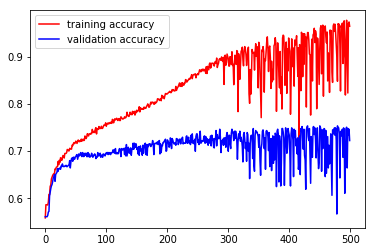

In [36]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

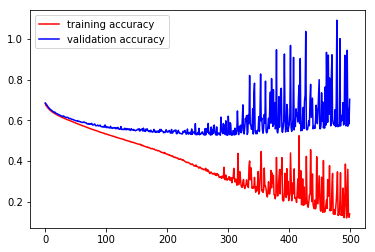

In [37]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [38]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [39]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 0s 292us/step - loss: 0.6773 - acc: 0.5765 - val_loss: 0.6840 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 127us/step - loss: 0.6814 - acc: 0.5765 - val_loss: 0.6798 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.6755 - acc: 0.5838 - val_loss: 0.6752 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.6716 - acc: 0.5844 - val_loss: 0.6730 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 121us/step - loss: 0.6663 - acc: 0.5893 - val_loss: 0.6681 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.6653 - acc: 0.6002 - val_loss: 0.6652 - val_acc: 0.5652
Epoch 7/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.6632 - acc: 0.5960 - val_loss: 0.6624 - val_acc: 0

1646/1646 [==============================] - 0s 131us/step - loss: 0.5976 - acc: 0.6956 - val_loss: 0.6041 - val_acc: 0.6686
Epoch 61/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5985 - acc: 0.6932 - val_loss: 0.6035 - val_acc: 0.6686
Epoch 62/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.5968 - acc: 0.6987 - val_loss: 0.5992 - val_acc: 0.6799
Epoch 63/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.5988 - acc: 0.6956 - val_loss: 0.6020 - val_acc: 0.6700
Epoch 64/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.5924 - acc: 0.6981 - val_loss: 0.5989 - val_acc: 0.6799
Epoch 65/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5915 - acc: 0.7151 - val_loss: 0.5983 - val_acc: 0.6813
Epoch 66/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.5938 - acc: 0.6981 - val_loss: 0.5964 - val_acc: 0.6870
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 140us/step - loss: 0.5483 - acc: 0.7400 - val_loss: 0.5653 - val_acc: 0.6997
Epoch 120/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.5504 - acc: 0.7363 - val_loss: 0.5680 - val_acc: 0.6983
Epoch 121/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.5481 - acc: 0.7363 - val_loss: 0.5660 - val_acc: 0.6997
Epoch 122/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.5415 - acc: 0.7552 - val_loss: 0.5656 - val_acc: 0.6997
Epoch 123/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5449 - acc: 0.7454 - val_loss: 0.5638 - val_acc: 0.7011
Epoch 124/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.5486 - acc: 0.7394 - val_loss: 0.5677 - val_acc: 0.6983
Epoch 125/500
1646/1646 [==============================] - 0s 121us/step - loss: 0.5455 - acc: 0.7412 - val_loss: 0.5662 - val_acc: 0.7025
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 129us/step - loss: 0.5049 - acc: 0.7740 - val_loss: 0.5488 - val_acc: 0.7110
Epoch 179/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.5031 - acc: 0.7679 - val_loss: 0.5523 - val_acc: 0.7153
Epoch 180/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.5011 - acc: 0.7770 - val_loss: 0.5604 - val_acc: 0.6983
Epoch 181/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.5060 - acc: 0.7618 - val_loss: 0.5488 - val_acc: 0.7096
Epoch 182/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.5002 - acc: 0.7746 - val_loss: 0.5475 - val_acc: 0.7110
Epoch 183/500
1646/1646 [==============================] - 0s 122us/step - loss: 0.5026 - acc: 0.7722 - val_loss: 0.5566 - val_acc: 0.6969
Epoch 184/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.4977 - acc: 0.7764 - val_loss: 0.5481 - val_acc: 0.7110
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 138us/step - loss: 0.4693 - acc: 0.7904 - val_loss: 0.5411 - val_acc: 0.7224
Epoch 238/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.4658 - acc: 0.7910 - val_loss: 0.5419 - val_acc: 0.7210
Epoch 239/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.4549 - acc: 0.8117 - val_loss: 0.5418 - val_acc: 0.7210
Epoch 240/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.4651 - acc: 0.8007 - val_loss: 0.5530 - val_acc: 0.7054
Epoch 241/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.4627 - acc: 0.7922 - val_loss: 0.5421 - val_acc: 0.7210
Epoch 242/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.4655 - acc: 0.7989 - val_loss: 0.5391 - val_acc: 0.7266
Epoch 243/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.4674 - acc: 0.7934 - val_loss: 0.5494 - val_acc: 0.7068
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 142us/step - loss: 0.4198 - acc: 0.8098 - val_loss: 0.5340 - val_acc: 0.7295
Epoch 297/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4248 - acc: 0.8153 - val_loss: 0.5350 - val_acc: 0.7266
Epoch 298/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.4201 - acc: 0.8311 - val_loss: 0.5303 - val_acc: 0.7323
Epoch 299/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.4168 - acc: 0.8250 - val_loss: 0.5296 - val_acc: 0.7309
Epoch 300/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.4170 - acc: 0.8287 - val_loss: 0.5339 - val_acc: 0.7295
Epoch 301/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.4185 - acc: 0.8275 - val_loss: 0.5318 - val_acc: 0.7323
Epoch 302/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.4179 - acc: 0.8190 - val_loss: 0.5334 - val_acc: 0.7280
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 162us/step - loss: 0.3622 - acc: 0.8542 - val_loss: 0.5435 - val_acc: 0.7210
Epoch 356/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.3613 - acc: 0.8591 - val_loss: 0.5274 - val_acc: 0.7351
Epoch 357/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3710 - acc: 0.8530 - val_loss: 0.5243 - val_acc: 0.7408
Epoch 358/500
1646/1646 [==============================] - 0s 177us/step - loss: 0.3624 - acc: 0.8584 - val_loss: 0.5262 - val_acc: 0.7394
Epoch 359/500
1646/1646 [==============================] - 0s 176us/step - loss: 0.3584 - acc: 0.8591 - val_loss: 0.5577 - val_acc: 0.7167
Epoch 360/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.3751 - acc: 0.8493 - val_loss: 0.5719 - val_acc: 0.7054
Epoch 361/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.3649 - acc: 0.8578 - val_loss: 0.5292 - val_acc: 0.7309
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 158us/step - loss: 0.3226 - acc: 0.8761 - val_loss: 0.5408 - val_acc: 0.7266
Epoch 415/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.3217 - acc: 0.8815 - val_loss: 0.5481 - val_acc: 0.7181
Epoch 416/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.3214 - acc: 0.8785 - val_loss: 0.5242 - val_acc: 0.7422
Epoch 417/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3038 - acc: 0.8827 - val_loss: 0.5274 - val_acc: 0.7309
Epoch 418/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3184 - acc: 0.8767 - val_loss: 0.5255 - val_acc: 0.7436
Epoch 419/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.3142 - acc: 0.8748 - val_loss: 0.5270 - val_acc: 0.7309
Epoch 420/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.3130 - acc: 0.8779 - val_loss: 0.5542 - val_acc: 0.7238
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 140us/step - loss: 0.2690 - acc: 0.8943 - val_loss: 0.5449 - val_acc: 0.7309
Epoch 474/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.2742 - acc: 0.9119 - val_loss: 0.5393 - val_acc: 0.7280
Epoch 475/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.2743 - acc: 0.8894 - val_loss: 0.5276 - val_acc: 0.7521
Epoch 476/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.2643 - acc: 0.9010 - val_loss: 0.5343 - val_acc: 0.7394
Epoch 477/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.2638 - acc: 0.9058 - val_loss: 0.5576 - val_acc: 0.7394
Epoch 478/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.2607 - acc: 0.8998 - val_loss: 0.5321 - val_acc: 0.7521
Epoch 479/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.2566 - acc: 0.9070 - val_loss: 0.5965 - val_acc: 0.7238
Epoch 480/500
1646/1646 [================

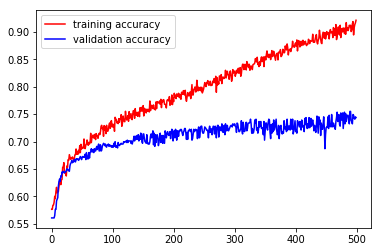

In [40]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

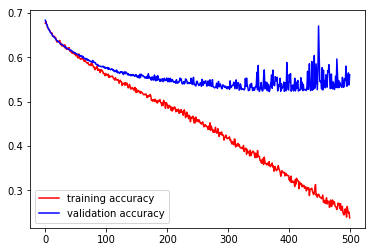

In [41]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [42]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 407us/step - loss: 0.7173 - acc: 0.5395 - val_loss: 0.6860 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.6989 - acc: 0.5522 - val_loss: 0.6809 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.6938 - acc: 0.5565 - val_loss: 0.6760 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.6958 - acc: 0.5498 - val_loss: 0.6734 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.6893 - acc: 0.5699 - val_loss: 0.6699 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 179us/step - loss: 0.6896 - acc: 0.5650 - val_loss: 0.6672 - val_acc: 0.5609
Epoch 7/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.6744 - acc: 0.5887 - val_loss: 0.6648 - val_acc: 0

1646/1646 [==============================] - 0s 161us/step - loss: 0.6164 - acc: 0.6525 - val_loss: 0.6063 - val_acc: 0.6742
Epoch 61/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.6243 - acc: 0.6537 - val_loss: 0.6063 - val_acc: 0.6742
Epoch 62/500
1646/1646 [==============================] - 0s 147us/step - loss: 0.6198 - acc: 0.6598 - val_loss: 0.6051 - val_acc: 0.6756
Epoch 63/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.6127 - acc: 0.6622 - val_loss: 0.6051 - val_acc: 0.6728
Epoch 64/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.6181 - acc: 0.6610 - val_loss: 0.6050 - val_acc: 0.6742
Epoch 65/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.6138 - acc: 0.6659 - val_loss: 0.6029 - val_acc: 0.6771
Epoch 66/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.6067 - acc: 0.6768 - val_loss: 0.6036 - val_acc: 0.6728
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 126us/step - loss: 0.5716 - acc: 0.7011 - val_loss: 0.5730 - val_acc: 0.6997
Epoch 120/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.5638 - acc: 0.7145 - val_loss: 0.5732 - val_acc: 0.6870
Epoch 121/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.5786 - acc: 0.7066 - val_loss: 0.5732 - val_acc: 0.6856
Epoch 122/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.5814 - acc: 0.7072 - val_loss: 0.5739 - val_acc: 0.6898
Epoch 123/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.5712 - acc: 0.7217 - val_loss: 0.5728 - val_acc: 0.6870
Epoch 124/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.5673 - acc: 0.7169 - val_loss: 0.5743 - val_acc: 0.6926
Epoch 125/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.5709 - acc: 0.7120 - val_loss: 0.5714 - val_acc: 0.6898
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 168us/step - loss: 0.5317 - acc: 0.7473 - val_loss: 0.5558 - val_acc: 0.7153
Epoch 179/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.5341 - acc: 0.7375 - val_loss: 0.5645 - val_acc: 0.6969
Epoch 180/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.5431 - acc: 0.7448 - val_loss: 0.5617 - val_acc: 0.7011
Epoch 181/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.5330 - acc: 0.7594 - val_loss: 0.5584 - val_acc: 0.7068
Epoch 182/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.5438 - acc: 0.7369 - val_loss: 0.5555 - val_acc: 0.7082
Epoch 183/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.5321 - acc: 0.7558 - val_loss: 0.5587 - val_acc: 0.7082
Epoch 184/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.5301 - acc: 0.7479 - val_loss: 0.5564 - val_acc: 0.7068
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 133us/step - loss: 0.4997 - acc: 0.7685 - val_loss: 0.5510 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.5100 - acc: 0.7606 - val_loss: 0.5512 - val_acc: 0.7167
Epoch 239/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.5013 - acc: 0.7631 - val_loss: 0.5521 - val_acc: 0.7167
Epoch 240/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.5108 - acc: 0.7643 - val_loss: 0.5660 - val_acc: 0.6955
Epoch 241/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.4964 - acc: 0.7582 - val_loss: 0.5480 - val_acc: 0.7210
Epoch 242/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.4978 - acc: 0.7710 - val_loss: 0.5470 - val_acc: 0.7195
Epoch 243/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.5019 - acc: 0.7618 - val_loss: 0.5480 - val_acc: 0.7224
Epoch 244/500
1646/1646 [================

In [ ]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
estop = EarlyStopping(monitor='val_acc', patience=10)

In [ ]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid), callbacks=[estop])

## Problem 5 - More time to Train

### BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

## Problem 6 - Not an Appropriate Architecture for the problem

In [ ]:
from keras.applications import vgg16, resnet50

In [ ]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(224, 224))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [ ]:
train_x = vgg16.preprocess_input(images, mode='tf')
train_y = data.emergency_or_not.values

In [ ]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [ ]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
for layer in base_model.layers:
    layer.Trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=3, batch_size=32,validation_data=(X_valid,Y_valid))